In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('datasets\Spotify_Top100_Songs.csv')

In [196]:
data.head()

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,4ZtFanR9U6ndgddUvNcjcG,Good 4 U Olivia Rodrigo,2.97,0.664,9,-5.044,1,0.1540,0.33500,0.000,0.0849,0.688,166.928,0.563
1,5fxyZf6m2xHeSrOzUfcJrq,Stay The Kid LAROI & Justin Bieber,2.30,0.506,8,-11.275,1,0.0589,0.37900,0.868,0.1100,0.454,170.054,0.564
2,5nujrmhLynf4yMoMtj8AQF,Levitating Dua Lipa feat. DaBaby,3.38,0.825,6,-3.787,0,0.0601,0.00883,0.000,0.0674,0.915,102.977,0.702
3,4iJyoBOLtHqaGxP12qzhQI,Peaches Justin Bieber feat. Daniel Caesar & Gi...,3.30,0.696,0,-6.181,1,0.1190,0.32100,0.000,0.4200,0.464,90.030,0.677
4,1SC5rEoYDGUK4NfG82494W,Montero (Call Me By Your Name) Lil Nas X,2.30,0.503,8,-6.725,0,0.2200,0.29300,0.000,0.4050,0.710,178.781,0.593


In [4]:
data['key'] = np.where(data['key'] == 0, 'C',
                np.where(data['key'] == 1, 'C#/Db',
                np.where(data['key'] == 2, 'D',
                np.where(data['key'] == 3, 'D#/Eb',
                np.where(data['key'] == 4, 'E',
                np.where(data['key'] == 5, 'F',
                np.where(data['key'] == 6, 'F#/Gb',
                np.where(data['key'] == 7, 'G',
                np.where(data['key'] == 8, 'G#/Ab',
                np.where(data['key'] == 9, 'A',
                np.where(data['key'] == 10, 'A#/Bb',
                np.where(data['key'] == 11, 'B', 'No Key'))))))))))))

data['mode'] = np.where(data['mode'] == 0, 'Minor', 'Major')

In [5]:
data['id'] = data['id'].astype('string')
data['name'] = data['name'].astype('string')
data['key'] = data['key'].astype('string')
data['mode'] = data['mode'].astype('string')

Analizamos los tipos de datos y si hay valores nulos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    string 
 1   name              100 non-null    string 
 2   duration          100 non-null    float64
 3   energy            100 non-null    float64
 4   key               100 non-null    string 
 5   loudness          100 non-null    float64
 6   mode              100 non-null    string 
 7   speechiness       100 non-null    float64
 8   acousticness      100 non-null    float64
 9   instrumentalness  100 non-null    float64
 10  liveness          100 non-null    float64
 11  valence           100 non-null    float64
 12  tempo             100 non-null    float64
 13  danceability      100 non-null    float64
dtypes: float64(10), string(4)
memory usage: 11.1 KB


In [7]:
data.isna().sum()

id                  0
name                0
duration            0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
danceability        0
dtype: int64

Análisis univariado: De está forma podemos observar las variables generales del dataset y sus medidas estadísticas.

In [8]:
data.describe()

,duration,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.404900,0.587650,-6.577120,0.075461,0.314539,0.070682,0.161737,0.517354,121.548260,0.647900
std,0.927022,0.168273,2.447338,0.068065,0.281076,0.221947,0.112657,0.237512,29.148613,0.126942
min,0.730000,0.157000,-14.067000,0.025300,0.000280,0.000000,0.034100,0.059200,71.884000,0.352000
25%,2.910000,0.477750,-7.676250,0.036100,0.090750,0.000000,0.088375,0.329000,97.476250,0.566750
50%,3.370000,0.609000,-6.262500,0.051800,0.238500,0.000000,0.120000,0.542000,117.037500,0.663500
75%,3.630000,0.707750,-4.786750,0.080650,0.519750,0.000083,0.205250,0.711500,141.733750,0.734000
max,10.220000,0.883000,-2.724000,0.368000,0.941000,0.941000,0.509000,0.967000,180.917000,0.910000


Histograma y densidad de las variables con características: De esta forma vamos a poder observar dónde se concentran los datos

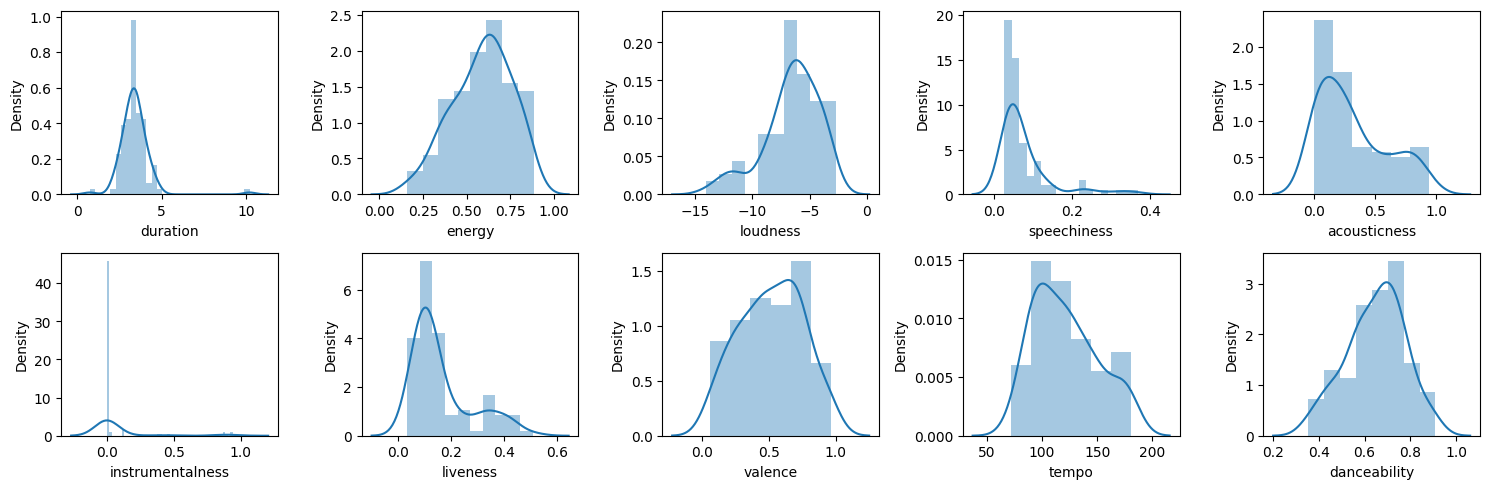

In [9]:
# Selecciono las columnas con métricas para graficar
columns = ['duration', 'energy', 'loudness', 'speechiness',
'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'danceability']

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
axs = axs.ravel()

for i in range(len(columns)):
    sns.distplot(data[columns[i]], ax=axs[i])

plt.tight_layout()

Realizamos lo mismo pero para boxplots, cuyo objetivo es observar outliers

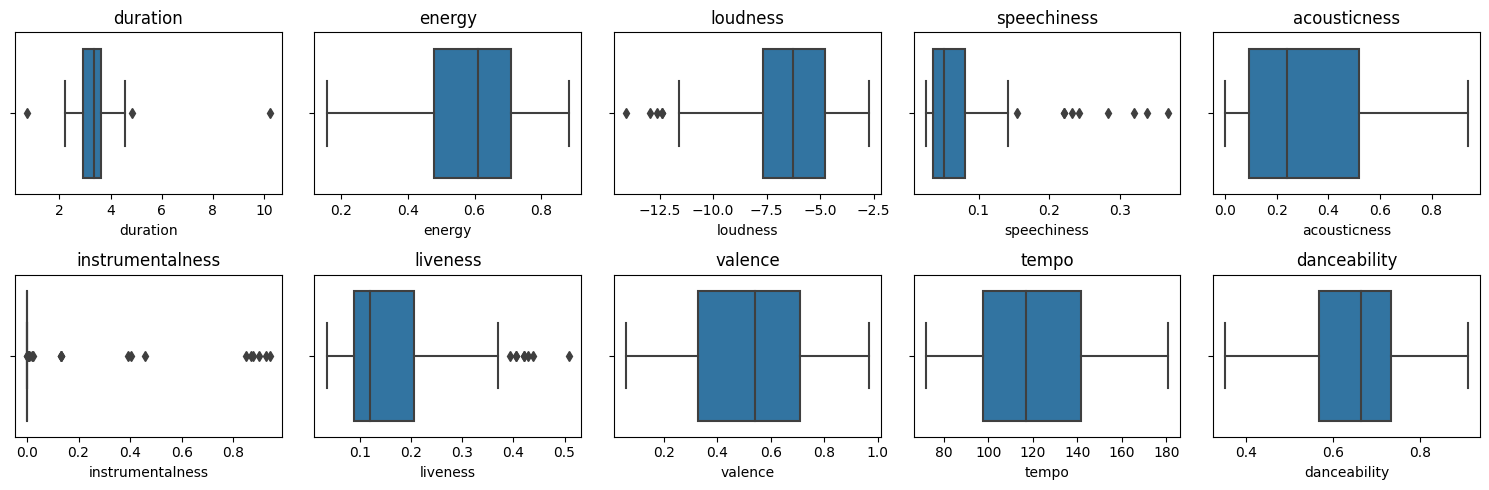

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
axs = axs.ravel()

for col, ax in zip(columns, axs.flatten()):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(col)

fig.tight_layout()
plt.show()

In [11]:
data['mode'].value_counts(normalize=True)

Major    0.56
Minor    0.44
Name: mode, dtype: Float64

In [12]:
data['key'].value_counts(normalize=True)

C        0.17
C#/Db    0.13
B        0.13
F#/Gb     0.1
G#/Ab    0.09
F        0.09
E        0.09
A#/Bb    0.05
G        0.05
A        0.04
D        0.03
D#/Eb    0.03
Name: key, dtype: Float64

Análisis Bivariado: Podemos observar las correlaciones entre variables, en este caso abierto por 'Mode' para observar las características principales de cada una.

<AxesSubplot:>

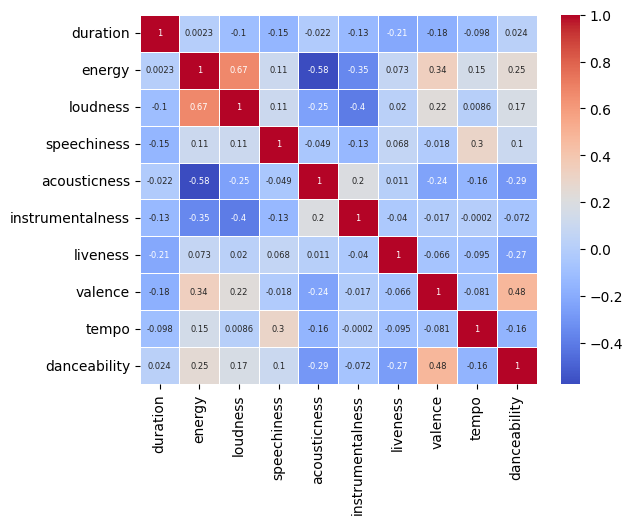

In [13]:
sns.heatmap(data.corr(), annot = True, annot_kws={"size":6}, cmap='coolwarm', linewidths=.5)

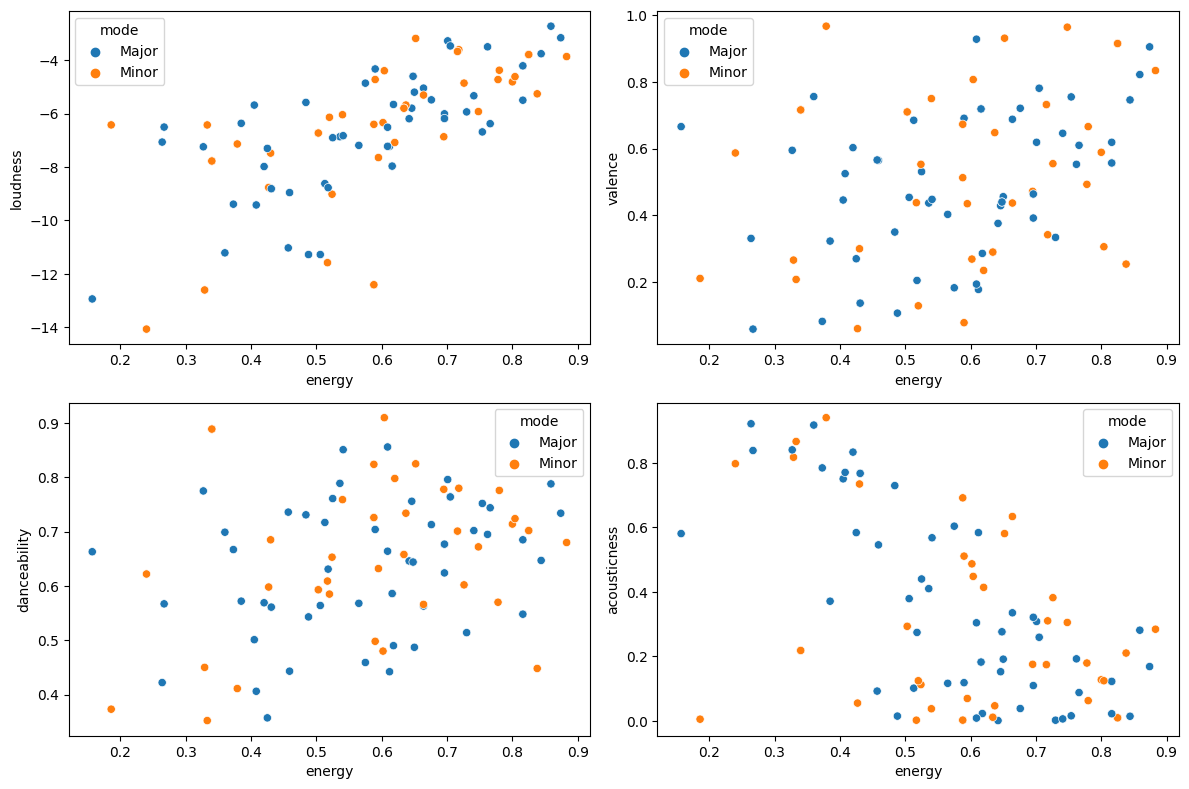

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
sns.scatterplot(data=data, x='energy', y='loudness', hue='mode', ax=ax[0][0])
sns.scatterplot(data=data, x='energy', y='valence', hue='mode', ax=ax[0][1])
sns.scatterplot(data=data, x='energy', y='danceability', hue='mode', ax=ax[1][0])
sns.scatterplot(data=data, x='energy', y='acousticness', hue='mode', ax=ax[1][1])

plt.tight_layout()

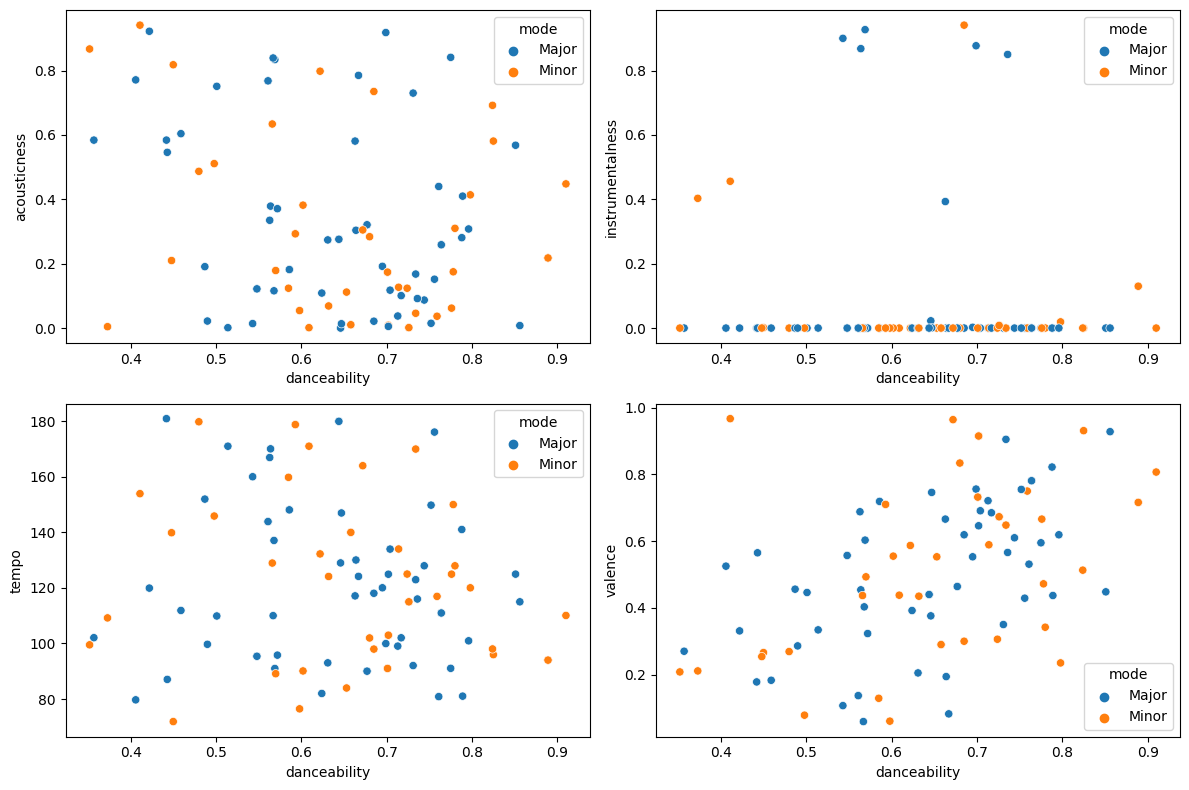

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
sns.scatterplot(data=data, x='danceability', y='acousticness', hue='mode', ax=ax[0][0])
sns.scatterplot(data=data, x='danceability', y='instrumentalness', hue='mode', ax=ax[0][1])
sns.scatterplot(data=data, x='danceability', y='tempo', hue='mode', ax=ax[1][0])
sns.scatterplot(data=data, x='danceability', y='valence', hue='mode', ax=ax[1][1])

plt.tight_layout()

Con estos gráficos y tablas podemos identificar las características principales de los temas del Top 100 de Spotify, así como identificar ciertas correlaciones entre estas características.